# Introduction to Neural Networking in Keras

We will use the version of Keras that comes in the Tensorflow package, as it has the most up to date tools.

In [43]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from seaborn import heatmap

from sklearn.metrics import mean_squared_error, classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# new libraries
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Data

We will be working with 2 different datasets in this project, 1 is a regression dataset and the other is a classification dataset.  This way you can practice doing both using deep learning.

**NOTE**

These datasets are very small for deep learning.  Deep learning models usually work best with very large datasets with at least 10,000 or more samples.  They work best on even larger datasets than that.  But, for demonstration we will use these smaller datasets.

## Regression
This is a dataset of housing prices in Boston from 1978.  Each row is a house and the dataset includes several features regarding each house.  Our target today will be the price of the home.



In [44]:
regression_df = pd.read_csv('https://raw.githubusercontent.com/ninja-josh/image-storage/main/Boston_Housing_from_Sklearn.csv')

# Regression

Let's start with modeling the regression dataset

In [45]:
regression_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   NOX      506 non-null    float64
 2   RM       506 non-null    float64
 3   AGE      506 non-null    float64
 4   PTRATIO  506 non-null    float64
 5   LSTAT    506 non-null    float64
 6   PRICE    506 non-null    float64
dtypes: float64(7)
memory usage: 27.8 KB


In [46]:
regression_df.duplicated().any()

False

In [47]:
regression_df.describe()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,0.554695,6.284634,68.574901,18.455534,12.653063,22.532806
std,8.601545,0.115878,0.702617,28.148861,2.164946,7.141062,9.197104
min,0.006320,0.385000,3.561000,2.900000,12.600000,1.730000,5.000000
25%,0.082045,0.449000,5.885500,45.025000,17.400000,6.950000,17.025000
50%,0.256510,0.538000,6.208500,77.500000,19.050000,11.360000,21.200000
75%,3.677083,0.624000,6.623500,94.075000,20.200000,16.955000,25.000000
max,88.976200,0.871000,8.780000,100.000000,22.000000,37.970000,50.000000


In [48]:
# Define X and Y and complete the train test split
X = regression_df.drop(columns = 'PRICE')
y = regression_df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

## Scaling

Always scale your data for deep learning.  Otherwise you get a problem call 'Exploding Weights'.  Some weights will be updated much faster than others because the inputs are at larger scales.  This tends to hurt learning as data on smaller scales does not update as fast and doesn't get to contribute as much to the decision making process.  By scaling we put all features on the same footing.

In [49]:
# Scale the data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Plot History

Since we will be plotting histories for all of our models, lets create a function to do it quickly.

In [50]:
# You can use this function to see how your model improves over time
def plot_history(history, metric=None):
  """plot loss and passed metric.  metric is passed as string and must match 'metric'
  argument in the compile step"""
  fig, axes = plt.subplots(2,1, figsize = (5,10))
  axes[0].plot(history.history['loss'], label = "train")
  axes[0].plot(history.history['val_loss'], label='test')
  axes[0].set_title('Loss')
  axes[0].legend()
  if metric:
    axes[1].plot(history.history[metric], label = 'train')
    axes[1].plot(history.history['val_' + metric], label = 'test')
    axes[1].set_title(metric)
    axes[1].legend()

  plt.show()

## First Simple Model

We always want to start simple, as deep learning models can get very complex fast and more complex models take more time to train and are more prone to overfitting.  A well performing simple model is better than a well performing complex model.

## Input layer
The first layer we will define is not technically the input layer.  We will define the first hidden layer with a special argument that tells Keras how to create a input layer:

`input_dim=`

Input layers can also be defined manually using tensorflow.keras.layers.InputLayer

## Activation function

For the single hidden layer we will try just 10 nodes and use a ReLU activation.  ReLUs tend to perform well for hidden nodes.

## Output Layer

For out output layer (last layer) we just use 1 node because we only want 1 number to be outputted.  We will use a linear activation function.  This will simply output the value from the weights and bias in the node with no change.




In [51]:
X_train.shape[1]

6

In [52]:
# Create your model
reg_model = Sequential(name='Regression_NN')
reg_model.add(Dense(10, activation = 'relu', input_dim = X_train.shape[1],name='h1'))
reg_model.add(Dense(1,name='Output'))
reg_model.summary()

Model: "Regression_NN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 10)                70        
                                                                 
 Output (Dense)              (None, 1)                 11        
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [53]:
# visualize_nn(reg_model, description=True, figsize=(13,10))

## Compiling

An Adam optimizer is a favorite and often performs well, it's a good place to start.  Our loss function, what our model will try to minimize, as well as our output metrics, what our model history will show, will both be mean squared error.

- Other optimizers : Gradient Descent,Stochastic Gradient Descent,Adagrad,RMSProp

In [54]:
# Compile your model.  To use the included function, include metrics= ['mse'] in your compilation step
reg_model.compile(optimizer = 'adam', loss = 'mse', metrics = 'mse')

# Training

Let's try training our model for 100 few epochs.  Sometimes that is enough, and it will give us an idea whether our model is learning anything.

In [55]:
# Fit your model
history = reg_model.fit(X_train, y_train,
                        validation_data = (X_test, y_test),
                        epochs = 100)

Epoch 1/100
12/12 [==============================] - 1s 18ms/step - loss: 594.9585 - mse: 594.9585 - val_loss: 504.6290 - val_mse: 504.6290
Epoch 2/100
12/12 [==============================] - 0s 12ms/step - loss: 591.2131 - mse: 591.2131 - val_loss: 501.0313 - val_mse: 501.0313
Epoch 3/100
12/12 [==============================] - 0s 10ms/step - loss: 587.4632 - mse: 587.4632 - val_loss: 497.3885 - val_mse: 497.3885
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 583.6381 - mse: 583.6381 - val_loss: 493.6883 - val_mse: 493.6883
Epoch 5/100
12/12 [==============================] - 0s 8ms/step - loss: 579.7294 - mse: 579.7294 - val_loss: 489.8969 - val_mse: 489.8969
Epoch 6/100
12/12 [==============================] - 0s 8ms/step - loss: 575.7624 - mse: 575.7624 - val_loss: 486.0247 - val_mse: 486.0247
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 571.6088 - mse: 571.6088 - val_loss: 481.9897 - val_mse: 481.9897
Epoch 8/100
12/12 [=====

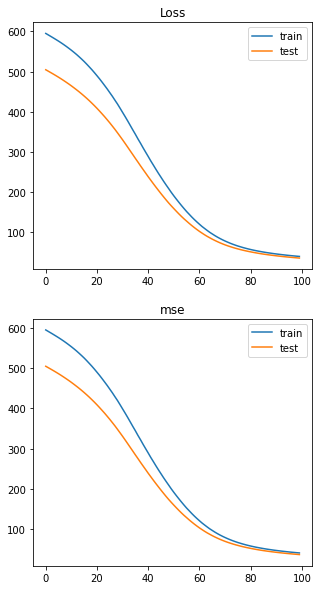

In [56]:
# Apply the custom function to see how your model is doing
plot_history(history, 'mse')

## Evaluation


In [57]:
# Make predictions and evaluate your model
train_preds = reg_model.predict(X_train)
test_preds = reg_model.predict(X_test)

print('training rmse:', np.sqrt(mean_squared_error(y_train, train_preds)))
print('testing rmse:', np.sqrt(mean_squared_error(y_test, test_preds)))


training rmse: 6.328608381024749
testing rmse: 6.026427189517882



# Classification:

Classification models are similar, except that we need to adjust the final activation of the output layer, the loss function in the compile step, and the metrics we use to judge them.  Remember: MAE, MSE, RMSE, and R2 are regression metrics, accuracy, recall, precision, F1-Score, and confusion matrices are classification metrics.

## Classification Dataset
The classification dataset describes diabetes rates among Pima Indians.  Each row is a person and this dataset and includes features regarding health related measurements.  The target binary and represents whether or not a person will diagnosed with diabetes.  This is another old dataset first presented in 1988.



In [58]:
classification_df = pd.read_csv('https://raw.githubusercontent.com/ninja-josh/image-storage/main/diabetes.csv')
classification_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [59]:
classification_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [60]:
classification_df.duplicated().any()

False

In [61]:
classification_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We see minimums for Glucose, BloodPression, SkinThickness, Insulin, and BMI of 0s.  Those are impossible for humans, so lets drop those rows.

In [62]:
no_glucose = classification_df['Glucose'] == 0
no_blood = classification_df['BloodPressure'] == 0
no_skin = classification_df['SkinThickness'] == 0
no_insulin = classification_df['Insulin'] == 0
no_bmi = classification_df['BMI'] == 0

#class_df_clean excludes rows that have no values == 0 in the above columns
class_df_clean = classification_df[~(no_glucose |
                                     no_blood |
                                     no_skin |
                                     no_insulin |
                                     no_bmi)]
class_df_clean.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We lost a lot of data, going from 768 samples to 392 samples.  In the future we might impute this data using means, medians, or other imputation strategies.  For this exercise we won't focus on that.

In [63]:
# Define X and y and train test split
X = class_df_clean.drop(columns = 'Outcome')
y = class_df_clean['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

In [64]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Classification Model

We need to do a few things differently here:

Since this is a binary classification, the activation of our final layer needs to be 'sigmoid'.  If this were multiclass we would set this as 'softmax' and the number of output nodes would be the number of classes in our y_train.



In [65]:
# Build your model
n_cols = X_train.shape[1]
class_model = Sequential(name='Classification')
class_model.add(Dense(10, activation = 'relu', input_dim = X_train.shape[1]))
class_model.add(Dense(10, activation = 'relu'))
class_model.add(Dense(1, activation = 'sigmoid'))
class_model.summary()

Model: "Classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                90        
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________


In [66]:
# visualize_nn(class_model, description=True, figsize=(10,8))

We need to change our loss to 'binary_crossentropy'.  If this were multiclass we would use 'categorical_crossentrobpy'.

Since MSE is a regression metric, not a classification metric, we change the metric to accuracy.  We could also use recall or precision. 

In [67]:
# # Compile your model, set metrics = ['acc']

class_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [68]:
# fit your model
history = class_model.fit(X_train, y_train,
                        validation_data = (X_test, y_test),
                        epochs = 100)

Epoch 1/100
10/10 [==============================] - 2s 41ms/step - loss: 0.6164 - accuracy: 0.7347 - val_loss: 0.6003 - val_accuracy: 0.7551
Epoch 2/100
10/10 [==============================] - 0s 21ms/step - loss: 0.5972 - accuracy: 0.7585 - val_loss: 0.5867 - val_accuracy: 0.8061
Epoch 3/100
10/10 [==============================] - 0s 10ms/step - loss: 0.5799 - accuracy: 0.7687 - val_loss: 0.5746 - val_accuracy: 0.8061
Epoch 4/100
10/10 [==============================] - 0s 14ms/step - loss: 0.5656 - accuracy: 0.7619 - val_loss: 0.5644 - val_accuracy: 0.8163
Epoch 5/100
10/10 [==============================] - 0s 9ms/step - loss: 0.5542 - accuracy: 0.7653 - val_loss: 0.5560 - val_accuracy: 0.8163
Epoch 6/100
10/10 [==============================] - 0s 19ms/step - loss: 0.5445 - accuracy: 0.7619 - val_loss: 0.5485 - val_accuracy: 0.8163
Epoch 7/100
10/10 [==============================] - 0s 17ms/step - loss: 0.5348 - accuracy: 0.7653 - val_loss: 0.5423 - val_accuracy: 0.8163
Epoch 8

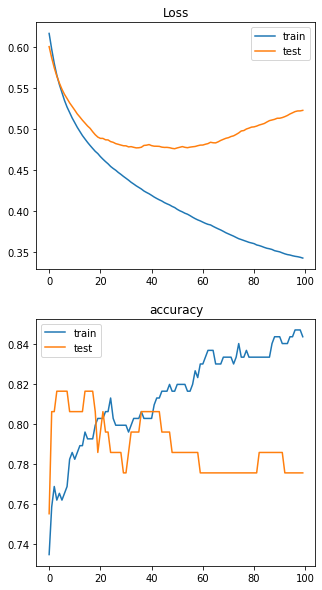

In [69]:
# See how your model is doing
plot_history(history, 'accuracy')

## Evaluation



Training Scores
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       196
           1       0.76      0.78      0.77        98

    accuracy                           0.84       294
   macro avg       0.82      0.83      0.82       294
weighted avg       0.84      0.84      0.84       294



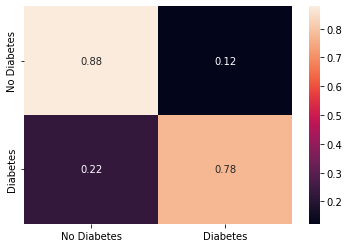



Testing Scores
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        66
           1       0.65      0.69      0.67        32

    accuracy                           0.78        98
   macro avg       0.75      0.75      0.75        98
weighted avg       0.78      0.78      0.78        98



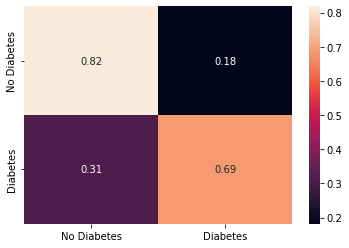

In [70]:
# Make predicitons and evaluate your model
print('Training Scores')

# Define labels for the confusion matrix
labels = ['No Diabetes', 'Diabetes']

# Get training predictions and round them to integers instead of floats
train_preds = np.rint(class_model.predict(X_train))

# Classification Report
print(classification_report(y_train, train_preds))

# Confusion Matrix
conf_mat = confusion_matrix(y_train, train_preds, normalize='true')
heatmap(conf_mat, xticklabels=labels, yticklabels=labels, annot=True)
plt.show()
print('\n')
print('Testing Scores')

# Get testing predictions and round them to integers
test_preds = np.rint(class_model.predict(X_test))

# Classification report
print(classification_report(y_test, test_preds))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, test_preds, normalize='true')
heatmap(conf_mat, xticklabels=labels, yticklabels=labels, annot=True)
plt.show()


You can find source of this visual function from here :[source](https://towardsdatascience.com/deep-learning-with-python-neural-networks-complete-tutorial-6b53c0b06af0)


In [71]:
'''
Extract info for each layer in a keras model.
'''
def utils_nn_config(model):
    lst_layers = []
    if "Sequential" in str(model): #-> Sequential doesn't show the input layer
        layer = model.layers[0]
        lst_layers.append({"name":"input", "in":int(layer.input.shape[-1]), "neurons":0, 
                           "out":int(layer.input.shape[-1]), "activation":None,
                           "params":0, "bias":0})
    for layer in model.layers:
        try:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":layer.units, 
                         "out":int(layer.output.shape[-1]), "activation":layer.get_config()["activation"],
                         "params":layer.get_weights()[0], "bias":layer.get_weights()[1]}
        except:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":0, 
                         "out":int(layer.output.shape[-1]), "activation":None,
                         "params":0, "bias":0}
        lst_layers.append(dic_layer)
    return lst_layers

def visualize_nn(model, description=False, figsize=(10,8)):
    ## get layers info
    lst_layers = utils_nn_config(model)
    layer_sizes = [layer["out"] for layer in lst_layers]
    
    ## fig setup
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()
    ax.set(title=model.name)
    ax.axis('off')
    left, right, bottom, top = 0.1, 0.9, 0.1, 0.9
    x_space = (right-left) / float(len(layer_sizes)-1)
    y_space = (top-bottom) / float(max(layer_sizes))
    p = 0.025
    
    ## nodes
    for i,n in enumerate(layer_sizes):
        top_on_layer = y_space*(n-1)/2.0 + (top+bottom)/2.0
        layer = lst_layers[i]
        color = "green" if i in [0, len(layer_sizes)-1] else "blue"
        color = "red" if (layer['neurons'] == 0) and (i > 0) else color
        
        ### add description
        if (description is True):
            d = i if i == 0 else i-0.5
            if layer['activation'] is None:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
            else:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
                plt.text(x=left+d*x_space, y=top-p, fontsize=10, color=color, s=layer['activation']+" (")
                plt.text(x=left+d*x_space, y=top-2*p, fontsize=10, color=color, s="Σ"+str(layer['in'])+"[X*w]+b")
                out = " Y"  if i == len(layer_sizes)-1 else " out"
                plt.text(x=left+d*x_space, y=top-3*p, fontsize=10, color=color, s=") = "+str(layer['neurons'])+out)
        
        ### circles
        for m in range(n):
            color = "limegreen" if color == "green" else color
            circle = plt.Circle(xy=(left+i*x_space, top_on_layer-m*y_space-4*p), radius=y_space/4.0, color=color, ec='k', zorder=4)
            ax.add_artist(circle)
            
            ### add text
            if i == 0:
                plt.text(x=left-4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$X_{'+str(m+1)+'}$')
            elif i == len(layer_sizes)-1:
                plt.text(x=right+4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$y_{'+str(m+1)+'}$')
            else:
                plt.text(x=left+i*x_space+p, y=top_on_layer-m*y_space+(y_space/8.+0.01*y_space)-4*p, fontsize=10, s=r'$H_{'+str(m+1)+'}$')
    
    ## links
    for i, (n_a, n_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer = lst_layers[i+1]
        color = "green" if i == len(layer_sizes)-2 else "blue"
        color = "red" if layer['neurons'] == 0 else color
        layer_top_a = y_space*(n_a-1)/2. + (top+bottom)/2. -4*p
        layer_top_b = y_space*(n_b-1)/2. + (top+bottom)/2. -4*p
        for m in range(n_a):
            for o in range(n_b):
                line = plt.Line2D([i*x_space+left, (i+1)*x_space+left], 
                                  [layer_top_a-m*y_space, layer_top_b-o*y_space], 
                                  c=color, alpha=0.5)
                if layer['activation'] is None:
                    if o == m:
                        ax.add_artist(line)
                else:
                    ax.add_artist(line)
    plt.show()
